## Question - How has the height of NBA Centers Changed Over the Years?

In [2]:
# Import relevant packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
# Read in dataset, relevant fields, & specify column types

use_cols = ['year_start', 'position', 'height']
col_types = {'year_start': int, 'position': 'category', 'height': object}

player_data = pd.read_csv('player_data.csv', usecols=use_cols, dtype=col_types)

In [43]:
# Preview dataset

print(player_data.shape)
player_data.tail()

(4549, 5)


,year_start,position,height,year_bin,height_int
4545,2018,F-C,6-11,2010-Current,83.0
4546,1983,C,7-1,1980-1989,85.0
4547,1971,G,6-1,1970-1979,73.0
4548,2017,C,7-1,2010-Current,85.0
4549,1949,G-F,6-3,1947-1959,75.0


In [44]:
player_data['position'].dtypes

CategoricalDtype(categories=['C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F'], ordered=False)

In [29]:
# Check for missing values

player_data.isna().sum()

year_start    0
position      1
height        1
dtype: int64

In [30]:
# Because data has so few missing vlaues, remove missing values (1 record in 4549)

player_data = player_data[~player_data['height'].isna()]

In [31]:
# Create bins for to display decades along x-axis

bins = [1946, 1959, 1969, 1979, 1989, 1999, 2009, 2018]
names = ['1947-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-Current']

player_data['year_bin'] = pd.cut(player_data['year_start'], bins, labels=names)

In [32]:
# Convert height from string to integer

def parse_ht(ht):
    ht_ = ht.split('-')
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return((12*ft_) + in_)

player_data['height_int'] = player_data['height'].apply(lambda x:parse_ht(x))

Text(0.5, 1.0, 'Center Height by Decade')

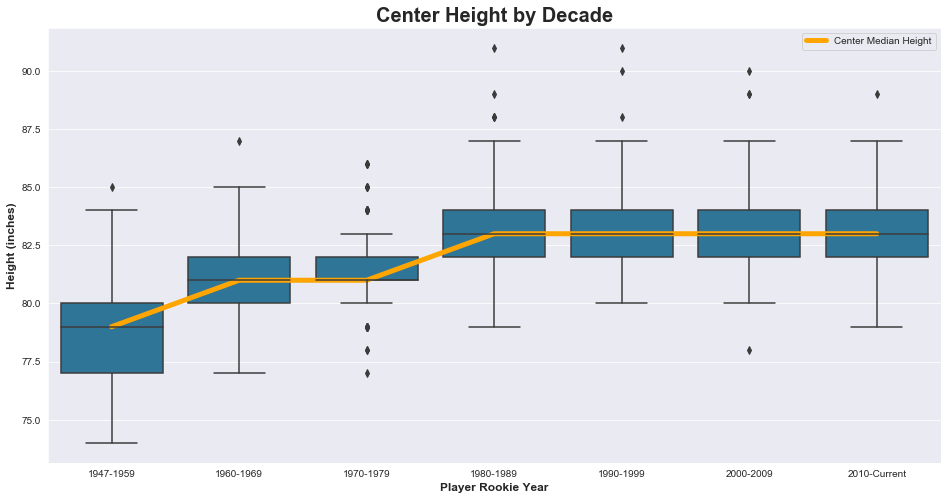

In [80]:
# Map

# Set seaborn styling
sns.set_style('darkgrid')

# Establish figure & axis
fig, ax = plt.subplots(figsize=[16,8]) 

# Define center position codes & create new dataframe for centers
center_position_codes = ['C', 'F-C', 'C-F']
center_player_data = player_data[player_data['position'].isin(center_position_codes)]

# Plot the median height by grouping 'year_bin' and converted 'height_int'
# Use orange and linewidth of 5 for good contrast
center_player_data.groupby('year_bin')['height_int'].median().plot(color='Orange', linewidth='5', label='Center Median Height')

# Create boxplots by 'year_bin' & converted 'height_int'
sns.boxplot(data=center_player_data, x='year_bin', y='height_int', color='#1E7BA8')

# Add appropriate labels for plot title, x-axis, & y-axis
plt.legend()
plt.xlabel('Player Rookie Year', fontweight='bold', fontsize=12)
plt.ylabel('Height (inches)', fontweight='bold', fontsize=12)
plt.title('Center Height by Decade', fontweight='bold', fontsize=20)

## How do NBA Guards and Centers Height Compare?

Text(0.5, 1.0, 'Guard Height by Decade')

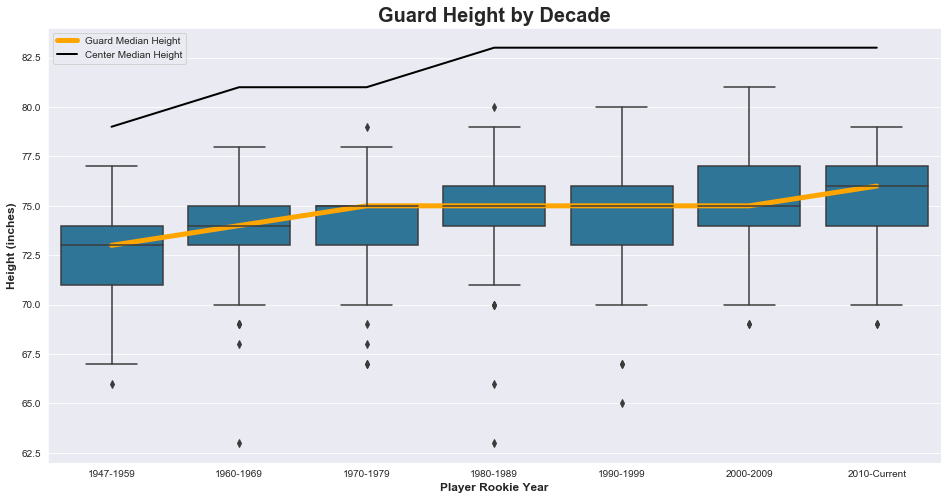

In [81]:
# Establish figure & axis
fig, ax = plt.subplots(figsize=[16,8]) 

# Define guard position codes & create new dataframe for guards
guard_position_codes = ['G']
guard_player_data = player_data[player_data['position'].isin(guard_position_codes)]

# Plot the median height by grouping 'year_bin' and converted 'height_int'
# Use orange and linewidth of 5 for good contrast
guard_player_data.groupby('year_bin')['height_int'].median().plot(color='Orange', linewidth='5', label='Guard Median Height')
center_player_data.groupby('year_bin')['height_int'].median().plot(color='Black', linewidth='2', label='Center Median Height')

# Create boxplots by 'year_bin' & converted 'height_int'
sns.boxplot(data=guard_player_data, x='year_bin', y='height_int', color='#1E7BA8')

# Add appropriate labels for plot title, x-axis, & y-axis
plt.legend()
plt.xlabel('Player Rookie Year', fontweight='bold', fontsize=12)
plt.ylabel('Height (inches)', fontweight='bold', fontsize=12)
plt.title('Guard Height by Decade', fontweight='bold', fontsize=20)